In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy

In [2]:
d_parser = lambda x : pd.datetime.strptime (x, '%Y-%m-%d')
df = pd.read_csv ('../data/cleanedMovieData.csv', parse_dates = ['release_date'], date_parser = d_parser)

In [3]:
# df.info()

In [4]:
df.drop (columns=['Unnamed: 0'], inplace=True)

In [5]:
# df['budget'] = df.budget.astype(float)

In [6]:
# money_df = df.loc[(~(df.budget == 0)) & (~(df.revenue == 0 ))]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45376 non-null  int64         
 1   genres                45376 non-null  object        
 2   imdb_id               45362 non-null  object        
 3   original_language     45365 non-null  object        
 4   original_title        45376 non-null  object        
 5   popularity            45376 non-null  float64       
 6   production_companies  45376 non-null  object        
 7   production_countries  45376 non-null  object        
 8   release_date          45376 non-null  datetime64[ns]
 9   revenue               7407 non-null   float64       
 10  runtime               45130 non-null  float64       
 11  spoken_languages      45376 non-null  object        
 12  title                 45376 non-null  object        
 13  vote_average    

In [8]:
df[['production_companies', 'title']]

,production_companies,title
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Grumpier Old Men
3,[{'name': 'Twentieth Century Fox Film Corporat...,Waiting to Exhale
4,"[{'name': 'Sandollar Productions', 'id': 5842}...",Father of the Bride Part II
...,...,...
45371,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",Robin Hood
45372,"[{'name': 'Sine Olivia', 'id': 19653}]",Century of Birthing
45373,"[{'name': 'American World Pictures', 'id': 6165}]",Betrayal
45374,"[{'name': 'Yermoliev', 'id': 88753}]",Satan Triumphant


In [9]:
import ast

In [10]:
df['production_companies'] = df['production_companies'].apply (lambda x : ast.literal_eval (x))

In [11]:
def get_companies (pro_list):
    company_list = list()
    for item in pro_list:
        company_list.append (item['name'])
    return company_list


In [12]:
df['production_companies'] = df['production_companies'].apply (get_companies)
df.to_csv ('../data/productionComp.csv')

In [13]:
from collections import Counter

In [14]:
production_comp = Counter ()
for item in list (df.production_companies):
    production_comp.update (item)

In [15]:
production_comp_list = []
number_of_movies = []
for items in  production_comp.most_common (15):
    production_comp_list.append (items[0])
    number_of_movies.append (items[1])
production_comp_list.reverse()
number_of_movies.reverse()

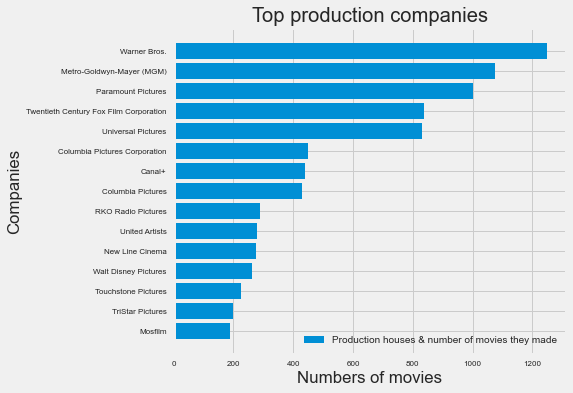

In [17]:
plt.style.use ('fivethirtyeight')
plt.xlabel ('Numbers of movies')
plt.title ('Top production companies')
plt.ylabel ('Companies')
SMALL_SIZE = 8
MEDIUM_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.barh (production_comp_list, number_of_movies, label = 'Production houses & number of movies they made')
plt.tight_layout ()
plt.legend()
plt.savefig('../Visualplots/TopProductionHouses.jpeg')